## BIKE SHARING MODEL ASSIGNMENT - LINEAR REGRESSION

In [1]:
## IMPORTING THE PACKAGES AS REQUIRED
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

import statsmodels.api as sm
import sklearn as skr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

### STEP 1 - READING AND UNDERSTANDING THE DATA

In [2]:
## READ THE CSV FILE AND CHECK THE DATA IMPORTED.
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### STEP 2 - CLEANING THE DATA

In [6]:
## DROP THE COLUMNS CASUAL AND REGISTERED - AS THEY ARE NOT FEATURES OF THE DATASET. 
data.drop(columns=['casual','registered'], inplace=True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# MAPPING ON MONTH, WEATHERSIT, SEASON AND WEEKDAY -- WEEKDAY MONDAY AS 6 
# DO EDA, FIND THE BEFORE EDA MISSING VALUES. ISNULL .SUM 
# CREATE UNIVARIATE AND BIVARIATE ANALYSIS, IF POSSIBLE DO A MULTIVARIATE GRAPH

# PREPARE DATA - GET DUMMIES ON DATA WHERE CATEGORIES > 2 
# SPLIT DATA 70 30
# SCALING IS REQUIRED (MIN MAX SCALER)
# FIT TRANSFORM AND TRANSFORM(TEST DATA)

# TAKE THE HYBRID APPROACH FOR FEATURE SELECTION
# DO NOT CALCULATE VIF FOR CONSTANT. 

In [8]:
## CONVERTING SEASON COLUMN (NUMERICAL) TO CATEGORICAL VARIABLE AND SAVING IT AS SEASON.
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
data['season'] = data['season'].map(season_mapping)

## CONVERTING WEATHERSIT COLUMN (NUMERICAL) TO CATEGORICAL VARIABLE AND SAVING IT AS WEATHERSIT.
weathersit_mapping = {1: 'Clear or Partly Cloudy', 2: 'Mist or Cloudy', 3: 'Light Snow or Rain', 4: 'Heavy Rain or Snow'}
data['weathersit'] = data['weathersit'].map(weathersit_mapping)

## CONVERTING MONTH COLUMN (NUMERICAL) TO CATEGORICAL VARIABLE AND SAVING IT AS MONTH.
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
data['mnth'] = data['mnth'].map(month_mapping)

## CONVERTING WEEKDAY COLUMN (NUMERICAL) TO CATEGORICAL VARIABLE AND SAVING IT AS WEEKDAY.
weekday_mapping = {0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6: 'Monday'}
data['weekday'] = data['weekday'].map(weekday_mapping)

## CONVERTING WORKING DAY COLUMN (NUMERICAL) TO CATEGORICAL VARIABLE AND SAVING IT AS WORKING DAY.
workingday_mapping = {0: 'WorkingDay', 1: 'Weekend/Holiday'}
data['workingday'] = data['workingday'].map(workingday_mapping)

## CONVERTING YEAR COLUMN (NUMERICAL) TO CATEGORICAL VARIABLE AND SAVING IT AS YEAR.
year_mapping = {0: '2018', 1: '2019'}
data['yr'] = data['yr'].map(year_mapping)


In [9]:
## DROP UNNECESSARY COLUMNS
column_to_drop = ['dteday']
data.drop(columns=column_to_drop, inplace= True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,January,0,Monday,WorkingDay,Mist or Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,January,0,Tuesday,WorkingDay,Mist or Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,January,0,Wednesday,Weekend/Holiday,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,2018,January,0,Thursday,Weekend/Holiday,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,2018,January,0,Friday,Weekend/Holiday,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


### STEP 3 - CONVERTING CATEGORICAL VARIABLES INTO DUMMY VARIABLES

In [10]:
## CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES.
season = pd.get_dummies(data['season'], drop_first=True)
season_int = season.astype(int)
season_int.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [11]:
## CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES.
weekday = pd.get_dummies(data['weekday'], drop_first=True)
weekday_int = weekday.astype(int)
weekday_int.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [12]:
## CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES.
weathersit = pd.get_dummies(data['weathersit'], drop_first=True)
weathersit_int = weathersit.astype(int)
weathersit_int.head()

,Light Snow or Rain,Mist or Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [13]:
## CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES.
month = pd.get_dummies(data['mnth'], drop_first=True)
month_int = month.astype(int)
month_int.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [14]:
## CONCAT THE DUMMY VARIABLE TO THE MAIN TABLE.
data = pd.concat([data, season_int, weekday_int, month_int, weathersit_int ], axis=1)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
0,1,spring,2018,January,0,Monday,WorkingDay,Mist or Cloudy,14.110847,18.18125,...,1,0,0,0,0,0,0,0,0,1
1,2,spring,2018,January,0,Tuesday,WorkingDay,Mist or Cloudy,14.902598,17.68695,...,1,0,0,0,0,0,0,0,0,1
2,3,spring,2018,January,0,Wednesday,Weekend/Holiday,Clear or Partly Cloudy,8.050924,9.47025,...,1,0,0,0,0,0,0,0,0,0
3,4,spring,2018,January,0,Thursday,Weekend/Holiday,Clear or Partly Cloudy,8.200000,10.60610,...,1,0,0,0,0,0,0,0,0,0
4,5,spring,2018,January,0,Friday,Weekend/Holiday,Clear or Partly Cloudy,9.305237,11.46350,...,1,0,0,0,0,0,0,0,0,0



#### FINDING THE MISSING VALUES IF ANY

In [15]:
### FINDING MISSING VALUES IN THE DATASET
data.isnull().sum()

instant               0
season                0
yr                    0
mnth                  0
holiday               0
weekday               0
workingday            0
weathersit            0
temp                  0
atemp                 0
hum                   0
windspeed             0
cnt                   0
spring                0
summer                0
winter                0
Monday                0
Saturday              0
Sunday                0
Thursday              0
Tuesday               0
Wednesday             0
August                0
December              0
February              0
January               0
July                  0
June                  0
March                 0
May                   0
November              0
October               0
September             0
Light Snow or Rain    0
Mist or Cloudy        0
dtype: int64

There are no missing values in the dataset.

### STEP 4 - EXPLORATORY DATA ANALYSIS

#### UNIVARIATE ANALYSIS

In [16]:
data.shape

(730, 35)

In [17]:
data['instant'].nunique() ## The count matches with total rows of dataset, hence all are unique

730

#### SEASONS COUNT CHART

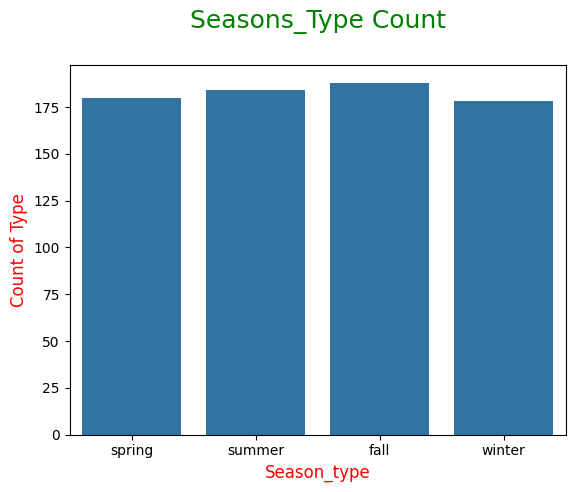

In [18]:
sns.countplot(data=data, x='season')
plt.title("Seasons_Type Count\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Season_type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

UNDERSTAND THAT IN ALL THE SEASONS, THE COUNT OF BIKE SHARING IS ALMOST EQUAL. 

#### YEAR COUNT CHART

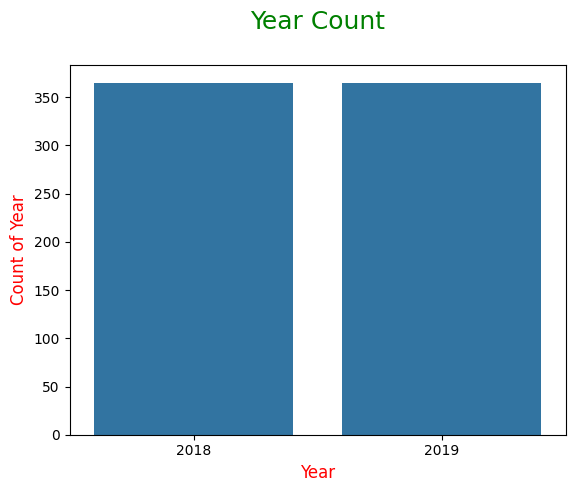

In [19]:
sns.countplot(data=data, x='yr')
plt.title("Year Count\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of Year", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Year", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

THE GRAPH SHOWS THAT BOTH YEARS 2018 AND 2019 HAS EQUAL NUMBER OF THE BIKE SHARING COUNTS.

WEATHERSIT COUNT GRAPH

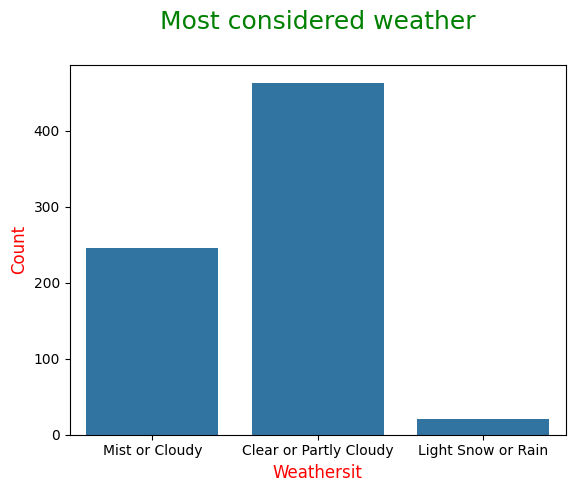

In [20]:
sns.countplot(data=data, x='weathersit')
plt.title("Most considered weather\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Weathersit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

THE BIKES ARE RENTED/SHARED MORE IN THE CLEAR/PARTLY CLOUDY WEAHTER CONDITIONS AND VERY LESS IN RAINY CONDITIONS.

MONTHLY ANALYSIS GRAPH

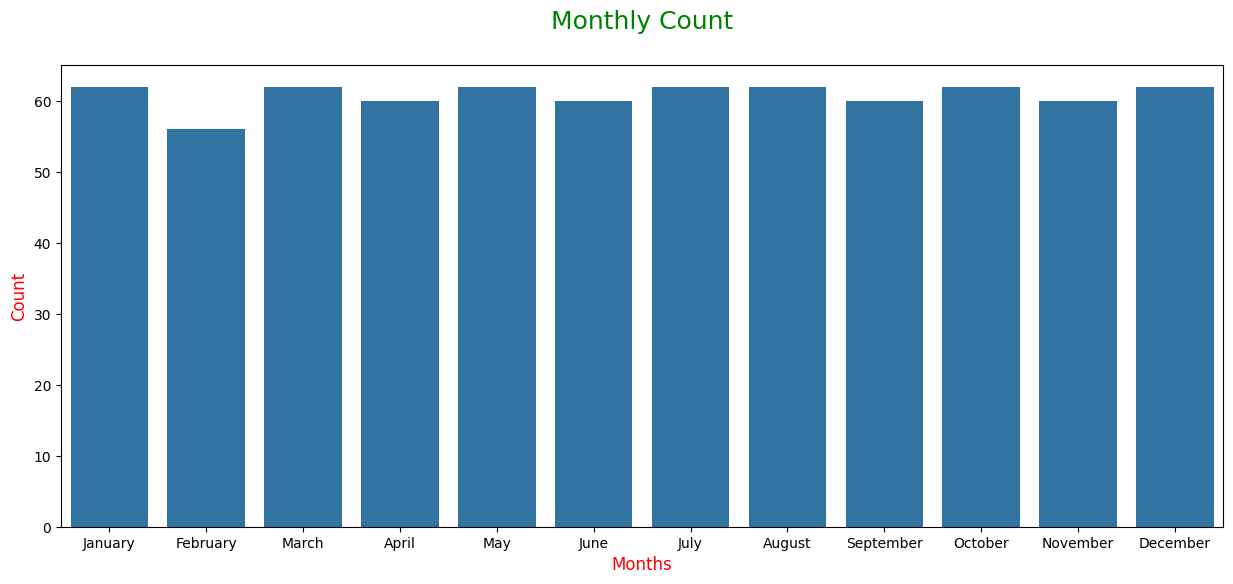

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='mnth')
plt.title("Monthly Count\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

BASED ON THE GRAPH WE UNDERSTAND THAT ALL THE MONTHS HAVE EQUAL COUNT OF BIKE SHARED/RENTED

#### BIVARIATE ANALYSIS

In [22]:
data.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Light Snow or Rain', 'Mist or Cloudy'],
      dtype='object')

COUNT OF BIKES RENTED IN BOTH THE YEARS

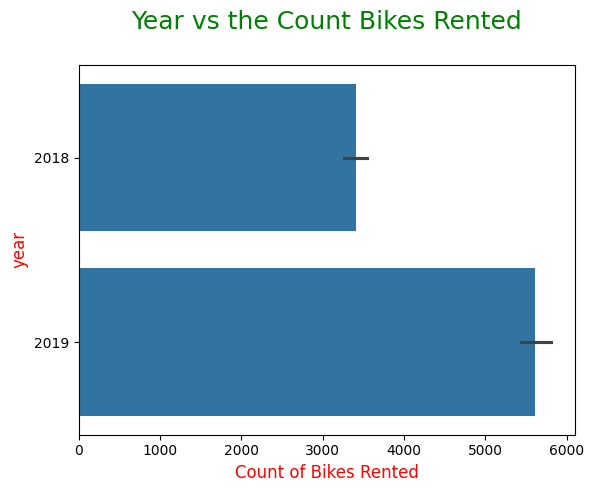

In [23]:
sns.barplot(data = data, y = 'yr', x = 'cnt')
plt.title("Year vs the Count Bikes Rented\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Count of Bikes Rented", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("year", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

WE UNDERSTAND THAT BIKES WERE RENTED MORE IN 2019.

#### SEASON VS THE COUNT OF BIKES RENTED

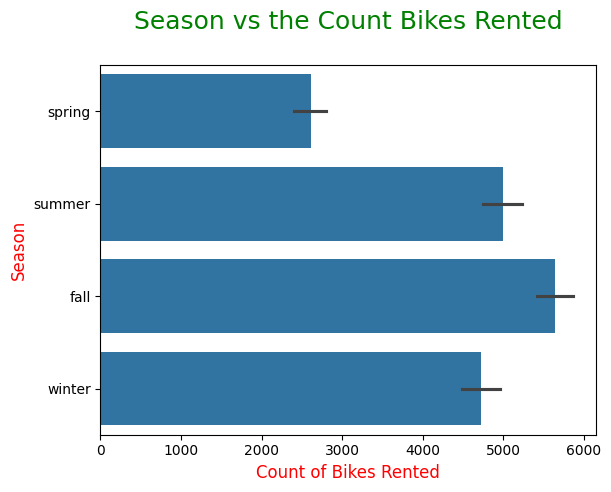

In [24]:
sns.barplot(data = data, y = 'season', x = 'cnt')
plt.title("Season vs the Count Bikes Rented\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Count of Bikes Rented", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("Season", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

WE UNDERSTAND THAT FALL, SUMMER AND WINTER ARE THE FAVOURITE SEASONS. 

#### WEEKDAY VS THE BIKES RENTED COUNT

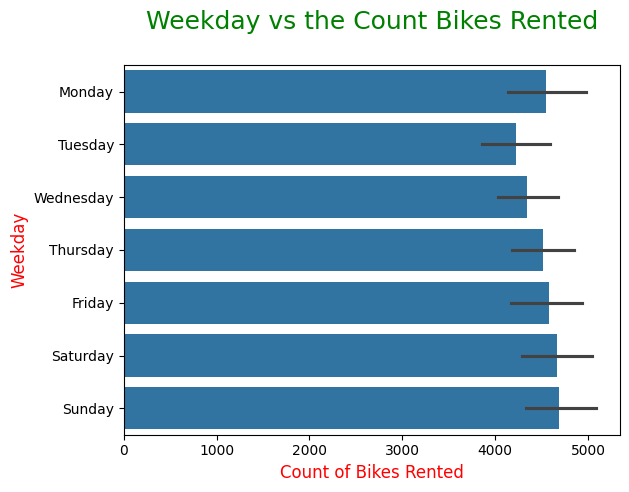

In [25]:
sns.barplot(data = data, y = 'weekday', x = 'cnt')
plt.title("Weekday vs the Count Bikes Rented\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Count of Bikes Rented", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("Weekday", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

WE NOTICE THAT ALMOST ALL DAYS IN THE WEEK ARE THE SAME COUNT.

#### MONTH VS THE COUNT OF BIKES

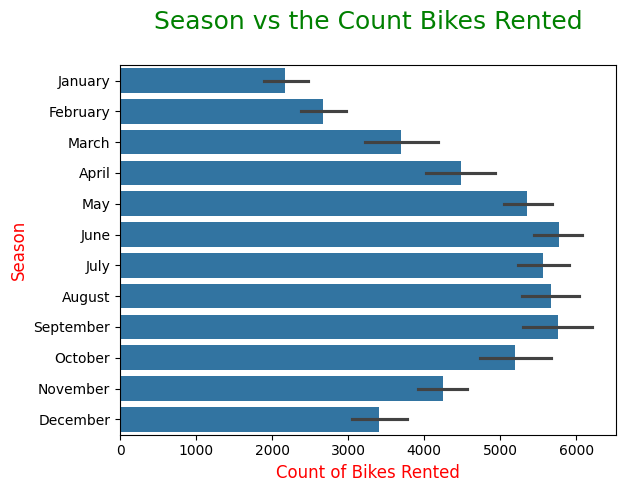

In [26]:
sns.barplot(data = data, y = 'mnth', x = 'cnt')
plt.title("Season vs the Count Bikes Rented\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Count of Bikes Rented", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("Season", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

OBSERVED THAT THE MONTHS BETWEEN JUNE, JULY, AUGUST AND SEPTEMBER HAS THE HIGHEST COUNT OF BIKE RENTALS

In [27]:
data = data.drop('season', axis=1)
data.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
0,1,2018,January,0,Monday,WorkingDay,Mist or Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,0,0,0,1
1,2,2018,January,0,Tuesday,WorkingDay,Mist or Cloudy,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,0,0,0,1
2,3,2018,January,0,Wednesday,Weekend/Holiday,Clear or Partly Cloudy,8.050924,9.47025,43.7273,...,1,0,0,0,0,0,0,0,0,0
3,4,2018,January,0,Thursday,Weekend/Holiday,Clear or Partly Cloudy,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,5,2018,January,0,Friday,Weekend/Holiday,Clear or Partly Cloudy,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,0,0,0


In [28]:
data = data.drop('weekday', axis=1)
data.head()

,instant,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
0,1,2018,January,0,WorkingDay,Mist or Cloudy,14.110847,18.18125,80.5833,10.749882,...,1,0,0,0,0,0,0,0,0,1
1,2,2018,January,0,WorkingDay,Mist or Cloudy,14.902598,17.68695,69.6087,16.652113,...,1,0,0,0,0,0,0,0,0,1
2,3,2018,January,0,Weekend/Holiday,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,...,1,0,0,0,0,0,0,0,0,0
3,4,2018,January,0,Weekend/Holiday,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,...,1,0,0,0,0,0,0,0,0,0
4,5,2018,January,0,Weekend/Holiday,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,...,1,0,0,0,0,0,0,0,0,0


In [29]:
data = data.drop('weathersit', axis=1)
data.head()

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
0,1,2018,January,0,WorkingDay,14.110847,18.18125,80.5833,10.749882,985,...,1,0,0,0,0,0,0,0,0,1
1,2,2018,January,0,WorkingDay,14.902598,17.68695,69.6087,16.652113,801,...,1,0,0,0,0,0,0,0,0,1
2,3,2018,January,0,Weekend/Holiday,8.050924,9.47025,43.7273,16.636703,1349,...,1,0,0,0,0,0,0,0,0,0
3,4,2018,January,0,Weekend/Holiday,8.200000,10.60610,59.0435,10.739832,1562,...,1,0,0,0,0,0,0,0,0,0
4,5,2018,January,0,Weekend/Holiday,9.305237,11.46350,43.6957,12.522300,1600,...,1,0,0,0,0,0,0,0,0,0


In [30]:
data = data.drop('mnth', axis=1)
data.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
0,1,2018,0,WorkingDay,14.110847,18.18125,80.5833,10.749882,985,1,...,1,0,0,0,0,0,0,0,0,1
1,2,2018,0,WorkingDay,14.902598,17.68695,69.6087,16.652113,801,1,...,1,0,0,0,0,0,0,0,0,1
2,3,2018,0,Weekend/Holiday,8.050924,9.47025,43.7273,16.636703,1349,1,...,1,0,0,0,0,0,0,0,0,0
3,4,2018,0,Weekend/Holiday,8.200000,10.60610,59.0435,10.739832,1562,1,...,1,0,0,0,0,0,0,0,0,0
4,5,2018,0,Weekend/Holiday,9.305237,11.46350,43.6957,12.522300,1600,1,...,1,0,0,0,0,0,0,0,0,0


In [31]:
data = data.drop('workingday', axis=1)
data.head()

,instant,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
0,1,2018,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,2018,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,3,2018,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,4,2018,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,5,2018,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


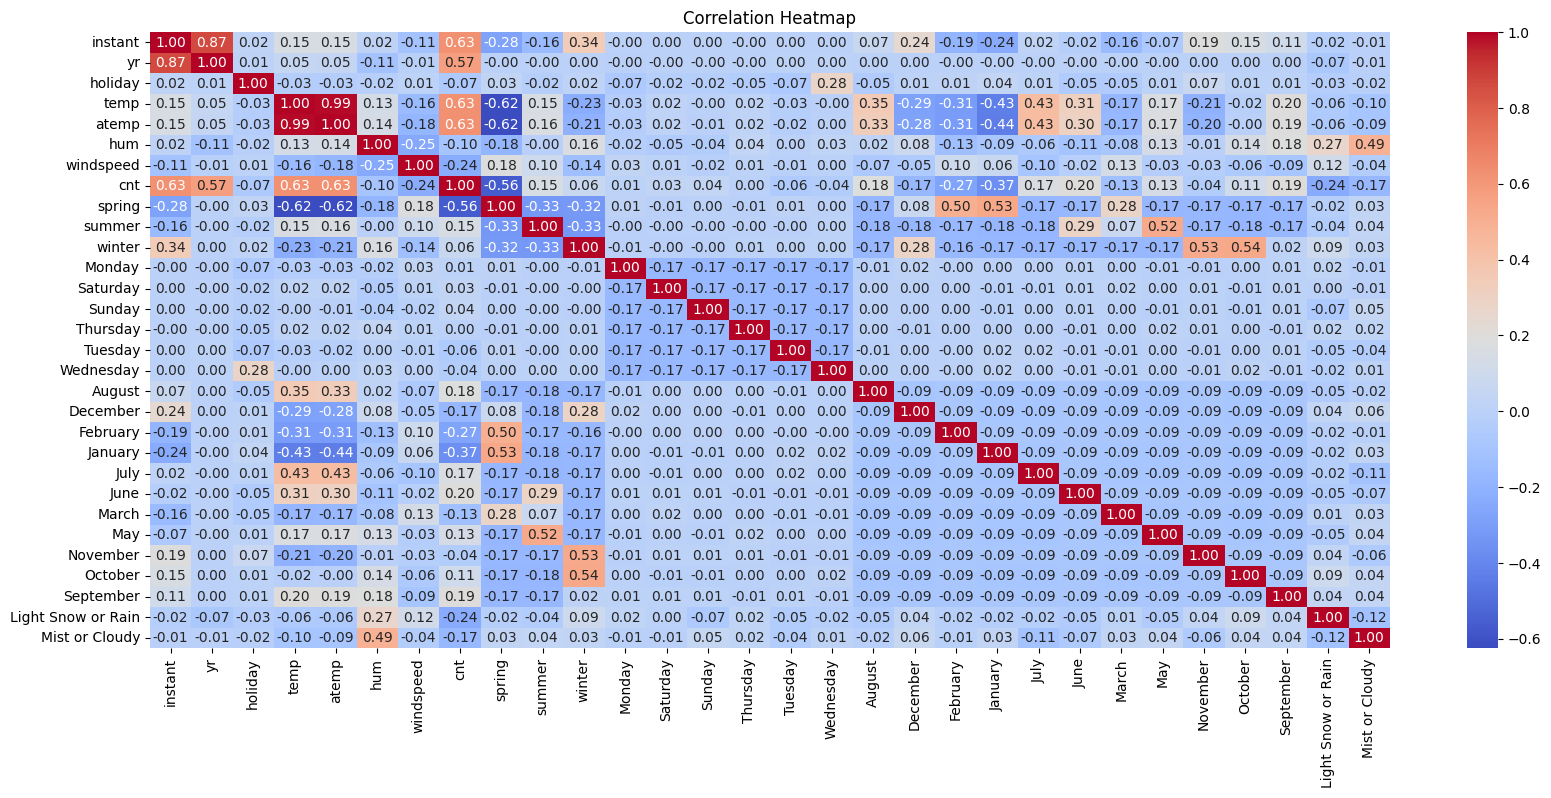

In [32]:
## CORRELATION HEATMAP
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [33]:
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape )

(510, 30)
(220, 30)


In [34]:
df_train.head()

,instant,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
576,577,2019,0,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,1,0,0,0,0,0,0,0,0
426,427,2019,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,729,2019,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,0
482,483,2019,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,1
111,112,2018,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# 1. CREATE AN OBJECT
scaler = MinMaxScaler()

# 2. CREATE LIST OF NUMERIC VARIABLES
num_list = ['instant', 'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 2. FIT ON DATA
df_train[num_list] = scaler.fit_transform(df_train[num_list])

df_train.head()

,instant,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
576,0.791209,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,0
426,0.585165,1.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1.000000,1.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,0
482,0.662088,1.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0.152473,0.0,0.0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

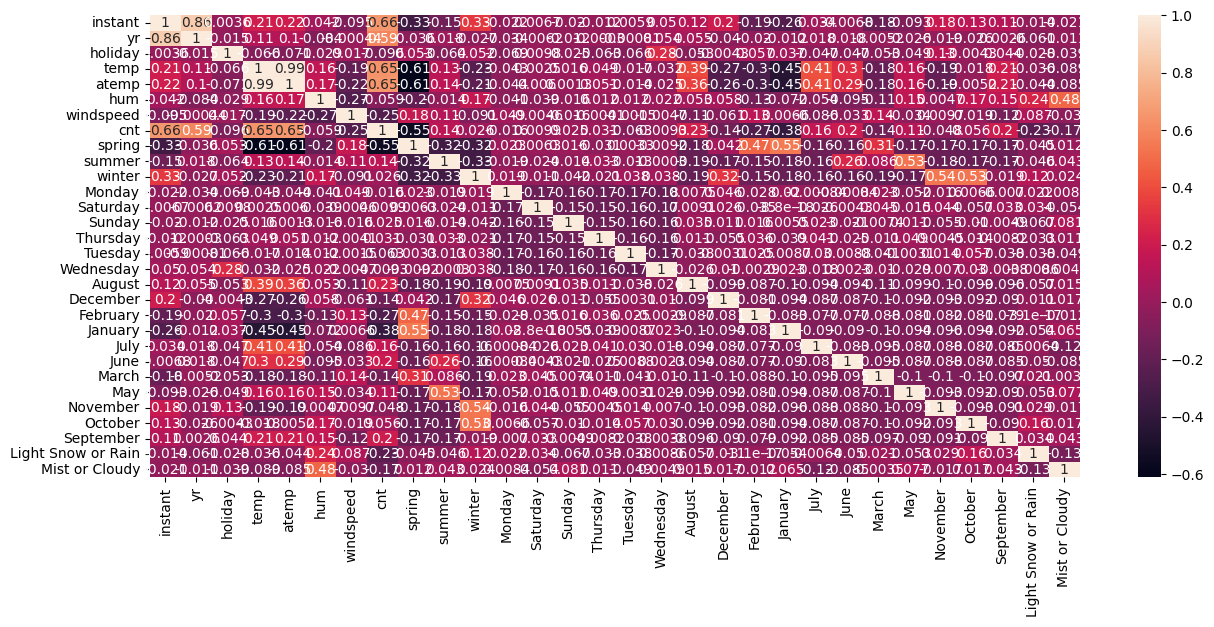

In [36]:
## START WITH ONE VARIABLE AND KEEP ON INCREASING. 
plt.figure(figsize=(15,6))
sns.heatmap(df_train.corr(), annot=True)
plt.show

In [37]:
df_train.columns

Index(['instant', 'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Light Snow or Rain', 'Mist or Cloudy'],
      dtype='object')

In [38]:
Y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
X_train.head()

,instant,yr,holiday,temp,atemp,hum,windspeed,spring,summer,winter,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
576,0.791209,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,0.585165,1.0,0.0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1.000000,1.0,0.0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0.662088,1.0,0.0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0.152473,0.0,0.0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
# ADD A CONSTANT
X_train_sm = sm.add_constant(X_train['temp'])

# CREATE A FIRST MODEL
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

#### ADDING ALL COLUMNS AND DROPPING WHICH IS NOT REQUIRED

In [41]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const                 0.351569
instant              -0.128155
yr                    0.296832
holiday              -0.085532
temp                  0.390301
atemp                 0.056246
hum                  -0.150975
windspeed            -0.183362
spring               -0.046044
summer                0.042459
winter                0.106319
Monday                0.004759
Saturday             -0.003819
Sunday                0.005959
Thursday             -0.012537
Tuesday              -0.049576
Wednesday            -0.015633
August                0.043991
December             -0.000695
February             -0.042185
January              -0.078155
July                 -0.016427
June                  0.016937
March                -0.003437
May                   0.030679
November             -0.001214
October               0.041197
September             0.113757
Light Snow or Rain   -0.255400
Mist or Cloudy       -0.059943
dtype: float64

In [42]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     95.78
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          2.62e-179
Time:                        13:17:32   Log-Likelihood:                 527.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     480   BIC:                            -867.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3516      0.064      5.513      0.000       0.226       0.477
instant               -0.1282      0.327     -0.392      0.695      -0.771       0.515
yr                     0.2968      0.164      1.806      0.071      -0.026       0.620
holiday               -0.0855      0.027     -3.198      0.001      -0.138      -0.033
temp                   0.3903      0.143      2.739      0.006       0.110       0.670
atemp                  0.0562      0.139      0.405      0.685      -0.216       0.329
hum                   -0.1510      0.039     -3.898      0.000      -0.227      -0.075
windspeed             -0.1834      0.026     -6.945      0.000      -0.235      -0.131
spring                -0.0460      0.030     -1.530      0.127      -0.105       0.013
summer                 0.0425      0.026      1.619      0.106      -0.009       0.094
winter                 0.1063      0.028      3.786      0.000       0.051       0.161
Monday                 0.0048      0.014      0.336      0.737      -0.023       0.033
Saturday              -0.0038      0.015     -0.260      0.795      -0.033       0.025
Sunday                 0.0060      0.015      0.398      0.691      -0.023       0.035
Thursday              -0.0125      0.015     -0.850      0.396      -0.042       0.016
Tuesday               -0.0496      0.014     -3.422      0.001      -0.078      -0.021
Wednesday             -0.0156      0.015     -1.067      0.287      -0.044       0.013
August                 0.0440      0.065      0.677      0.499      -0.084       0.172
December              -0.0007      0.116     -0.006      0.995      -0.229       0.228
February              -0.0422      0.042     -1.016      0.310      -0.124       0.039
January               -0.0782      0.051     -1.528      0.127      -0.179       0.022
July                  -0.0164      0.054     -0.303      0.762      -0.123       0.090
June                   0.0169      0.037      0.452      0.651      -0.057       0.091
March                 -0.0034      0.028     -0.124      0.901      -0.058       0.051
May                    0.0307      0.025      1.232      0.219      -0.018       0.080
November              -0.0012      0.105     -0.012      0.991      -0.208       0.205
October                0.0412      0.093      0.444      0.657      -0.141       0.223
September              0.1138      0.076      1.497      0.135      -0.036       0.263
Light Snow or Rain    -0.2554      0.027     -9.630      0.000      -0.308      -0.203
Mist or Cloudy        -0.0599      0.011     -5.706      0.000      -0.081      -0.039
==============================================================================
Omnibus:                       83.022   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (J

#### VIF

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
0,instant,1140.52
3,temp,444.81
1,yr,436.40
4,atemp,384.04
17,December,47.66
24,November,41.73
5,hum,41.62
25,October,31.66
26,September,22.06
16,August,20.71


In [44]:
X =X_train.drop('instant', axis=1)

In [45]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          2.81e-180
Time:                        13:17:33   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3337      0.044      7.507      0.000       0.246       0.421
yr                     0.2325      0.008     28.794      0.000       0.217       0.248
holiday               -0.0854      0.027     -3.196      0.001      -0.138      -0.033
temp                   0.3880      0.142      2.727      0.007       0.108       0.668
atemp                  0.0590      0.138      0.426      0.670      -0.213       0.331
hum                   -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed             -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring                -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer                 0.0424      0.026      1.617      0.107      -0.009       0.094
winter                 0.1071      0.028      3.826      0.000       0.052       0.162
Monday                 0.0048      0.014      0.339      0.734      -0.023       0.033
Saturday              -0.0038      0.015     -0.261      0.794      -0.033       0.025
Sunday                 0.0059      0.015      0.394      0.694      -0.023       0.035
Thursday              -0.0125      0.015     -0.851      0.395      -0.042       0.016
Tuesday               -0.0494      0.014     -3.415      0.001      -0.078      -0.021
Wednesday             -0.0157      0.015     -1.074      0.283      -0.044       0.013
August                 0.0223      0.034      0.657      0.511      -0.044       0.089
December              -0.0443      0.034     -1.316      0.189      -0.110       0.022
February              -0.0323      0.033     -0.980      0.327      -0.097       0.032
January               -0.0631      0.034     -1.876      0.061      -0.129       0.003
July                  -0.0327      0.035     -0.931      0.352      -0.102       0.036
June                   0.0060      0.025      0.241      0.810      -0.043       0.055
March                  0.0016      0.025      0.063      0.950      -0.047       0.050
May                    0.0255      0.021      1.208      0.228      -0.016       0.067
November              -0.0398      0.036     -1.093      0.275      -0.111       0.032
October                0.0077      0.036      0.215      0.830      -0.063       0.078
September              0.0868      0.032      2.711      0.007       0.024       0.150
Light Snow or Rain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Mist or Cloudy        -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):             

In [46]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,temp,436.72
3,atemp,383.66
4,hum,37.89
6,spring,11.76
8,winter,11.69
7,summer,6.88
24,October,6.29
23,November,6.09
15,August,5.94
5,windspeed,5.37


In [47]:
X =X.drop('atemp', axis=1)

In [48]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          3.00e-181
Time:                        13:17:33   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3338      0.044      7.516      0.000       0.247       0.421
yr                     0.2324      0.008     28.819      0.000       0.217       0.248
holiday               -0.0861      0.027     -3.234      0.001      -0.138      -0.034
temp                   0.4454      0.046      9.628      0.000       0.354       0.536
hum                   -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed             -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring                -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer                 0.0430      0.026      1.645      0.101      -0.008       0.094
winter                 0.1076      0.028      3.853      0.000       0.053       0.163
Monday                 0.0049      0.014      0.345      0.730      -0.023       0.033
Saturday              -0.0036      0.015     -0.248      0.804      -0.032       0.025
Sunday                 0.0055      0.015      0.368      0.713      -0.024       0.035
Thursday              -0.0124      0.015     -0.844      0.399      -0.041       0.017
Tuesday               -0.0493      0.014     -3.413      0.001      -0.078      -0.021
Wednesday             -0.0154      0.015     -1.057      0.291      -0.044       0.013
August                 0.0204      0.034      0.607      0.544      -0.046       0.086
December              -0.0443      0.034     -1.317      0.189      -0.110       0.022
February              -0.0324      0.033     -0.985      0.325      -0.097       0.032
January               -0.0633      0.034     -1.885      0.060      -0.129       0.003
July                  -0.0338      0.035     -0.969      0.333      -0.102       0.035
June                   0.0046      0.025      0.186      0.853      -0.044       0.053
March                  0.0013      0.025      0.052      0.959      -0.047       0.050
May                    0.0247      0.021      1.173      0.241      -0.017       0.066
November              -0.0399      0.036     -1.096      0.274      -0.111       0.032
October                0.0075      0.036      0.210      0.834      -0.063       0.078
September              0.0859      0.032      2.692      0.007       0.023       0.149
Light Snow or Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist or Cloudy        -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
3,hum,37.83
2,temp,36.80
5,spring,11.74
7,winter,11.66
6,summer,6.84
23,October,6.29
22,November,6.09
14,August,5.82
18,July,5.23
17,January,5.22


In [50]:
X =X.drop('hum', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          5.43e-179
Time:                        13:17:34   Log-Likelihood:                 518.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     483   BIC:                            -869.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2736      0.042      6.467      0.000       0.190       0.357
yr                     0.2362      0.008     29.074      0.000       0.220       0.252
holiday               -0.0845      0.027     -3.127      0.002      -0.138      -0.031
temp                   0.3955      0.045      8.761      0.000       0.307       0.484
windspeed             -0.1588      0.025     -6.311      0.000      -0.208      -0.109
spring                -0.0493      0.030     -1.621      0.106      -0.109       0.010
summer                 0.0341      0.026      1.292      0.197      -0.018       0.086
winter                 0.1037      0.028      3.660      0.000       0.048       0.159
Monday                 0.0068      0.014      0.475      0.635      -0.021       0.035
Saturday              -0.0017      0.015     -0.116      0.908      -0.031       0.028
Sunday                 0.0080      0.015      0.532      0.595      -0.022       0.038
Thursday              -0.0126      0.015     -0.846      0.398      -0.042       0.017
Tuesday               -0.0520      0.015     -3.546      0.000      -0.081      -0.023
Wednesday             -0.0169      0.015     -1.139      0.255      -0.046       0.012
August                 0.0173      0.034      0.508      0.612      -0.050       0.084
December              -0.0663      0.034     -1.972      0.049      -0.132      -0.000
February              -0.0455      0.033     -1.368      0.172      -0.111       0.020
January               -0.0821      0.034     -2.435      0.015      -0.148      -0.016
July                  -0.0300      0.035     -0.848      0.397      -0.100       0.040
June                   0.0122      0.025      0.487      0.626      -0.037       0.061
March                 -0.0065      0.025     -0.260      0.795      -0.055       0.042
May                    0.0179      0.021      0.842      0.400      -0.024       0.060
November              -0.0566      0.037     -1.543      0.123      -0.129       0.015
October               -0.0096      0.036     -0.264      0.792      -0.081       0.061
September              0.0742      0.032      2.301      0.022       0.011       0.138
Light Snow or Rain    -0.2970      0.025    -12.090      0.000      -0.345      -0.249
Mist or Cloudy        -0.0830      0.009     -9.568      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       86.370   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.777
Skew:                          -0.817   Prob(JB):                     1.16e-53
Kurtosis:                       5.967   Cond. No.                         32.1
==============================================================================

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,temp,26.57
6,winter,11.43
4,spring,11.21
22,October,5.85
5,summer,5.73
13,August,5.60
21,November,5.51
17,July,5.16
3,windspeed,4.94
16,January,4.58


In [52]:
X =X.drop('temp', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     90.41
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          1.18e-164
Time:                        13:17:34   Log-Likelihood:                 481.38
No. Observations:                 510   AIC:                            -910.8
Df Residuals:                     484   BIC:                            -800.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5057      0.035     14.258      0.000       0.436       0.575
yr                     0.2467      0.009     28.536      0.000       0.230       0.264
holiday               -0.0687      0.029     -2.367      0.018      -0.126      -0.012
windspeed             -0.1688      0.027     -6.246      0.000      -0.222      -0.116
spring                -0.0820      0.032     -2.528      0.012      -0.146      -0.018
summer                 0.0010      0.028      0.037      0.971      -0.054       0.056
winter                 0.0829      0.030      2.730      0.007       0.023       0.143
Monday                 0.0009      0.015      0.061      0.951      -0.029       0.031
Saturday              -0.0015      0.016     -0.095      0.924      -0.033       0.030
Sunday                 0.0050      0.016      0.307      0.759      -0.027       0.037
Thursday              -0.0127      0.016     -0.788      0.431      -0.044       0.019
Tuesday               -0.0568      0.016     -3.609      0.000      -0.088      -0.026
Wednesday             -0.0222      0.016     -1.396      0.163      -0.054       0.009
August                 0.1042      0.035      2.975      0.003       0.035       0.173
December              -0.1391      0.035     -3.967      0.000      -0.208      -0.070
February              -0.1287      0.034     -3.756      0.000      -0.196      -0.061
January               -0.1950      0.034     -5.814      0.000      -0.261      -0.129
July                   0.0795      0.036      2.231      0.026       0.009       0.150
June                   0.1083      0.024      4.473      0.000       0.061       0.156
March                 -0.0389      0.026     -1.471      0.142      -0.091       0.013
May                    0.0793      0.022      3.674      0.000       0.037       0.122
November              -0.1109      0.039     -2.854      0.005      -0.187      -0.035
October               -0.0102      0.039     -0.262      0.794      -0.087       0.066
September              0.1226      0.034      3.587      0.000       0.055       0.190
Light Snow or Rain    -0.3041      0.026    -11.515      0.000      -0.356      -0.252
Mist or Cloudy        -0.0869      0.009     -9.328      0.000      -0.105      -0.069
==============================================================================
Omnibus:                       85.214   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.711
Skew:                          -0.722   Prob(JB):                     3.39e-68
Kurtosis:                       6.540   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [53]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
5,winter,11.22
3,spring,10.58
20,November,5.26
21,October,5.15
2,windspeed,4.84
15,January,4.55
4,summer,4.24
13,December,4.14
14,February,3.68
18,March,3.12


In [54]:
X =X.drop('winter', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     92.64
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          4.70e-164
Time:                        13:17:34   Log-Likelihood:                 477.48
No. Observations:                 510   AIC:                            -905.0
Df Residuals:                     485   BIC:                            -799.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5360      0.034     15.806      0.000       0.469       0.603
yr                     0.2476      0.009     28.477      0.000       0.231       0.265
holiday               -0.0733      0.029     -2.517      0.012      -0.131      -0.016
windspeed             -0.1715      0.027     -6.308      0.000      -0.225      -0.118
spring                -0.1347      0.026     -5.137      0.000      -0.186      -0.083
summer                -0.0288      0.026     -1.102      0.271      -0.080       0.023
Monday                 0.0021      0.015      0.137      0.891      -0.028       0.033
Saturday              -0.0032      0.016     -0.199      0.842      -0.035       0.028
Sunday                 0.0046      0.016      0.278      0.781      -0.028       0.037
Thursday              -0.0122      0.016     -0.754      0.451      -0.044       0.020
Tuesday               -0.0565      0.016     -3.566      0.000      -0.088      -0.025
Wednesday             -0.0217      0.016     -1.356      0.176      -0.053       0.010
August                 0.0739      0.033      2.211      0.028       0.008       0.140
December              -0.0953      0.031     -3.036      0.003      -0.157      -0.034
February              -0.1055      0.033     -3.157      0.002      -0.171      -0.040
January               -0.1721      0.033     -5.266      0.000      -0.236      -0.108
July                   0.0493      0.034      1.446      0.149      -0.018       0.116
June                   0.0972      0.024      4.048      0.000       0.050       0.144
March                 -0.0241      0.026     -0.927      0.355      -0.075       0.027
May                    0.0790      0.022      3.636      0.000       0.036       0.122
November              -0.0575      0.034     -1.701      0.090      -0.124       0.009
October                0.0428      0.034      1.262      0.207      -0.024       0.109
September              0.1109      0.034      3.250      0.001       0.044       0.178
Light Snow or Rain    -0.3060      0.027    -11.518      0.000      -0.358      -0.254
Mist or Cloudy        -0.0866      0.009     -9.235      0.000      -0.105      -0.068
==============================================================================
Omnibus:                       84.837   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.562
Skew:                          -0.742   Prob(JB):                     2.19e-63
Kurtosis:                       6.373   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
3,spring,7.56
2,windspeed,4.82
4,summer,3.99
14,January,3.71
13,February,3.05
17,March,2.67
0,yr,2.01
10,Wednesday,1.98
5,Monday,1.92
18,May,1.84


In [56]:
X =X.drop('spring', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     90.77
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          1.63e-159
Time:                        13:17:35   Log-Likelihood:                 463.97
No. Observations:                 510   AIC:                            -879.9
Df Residuals:                     486   BIC:                            -778.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4661      0.032     14.628      0.000       0.404       0.529
yr                     0.2486      0.009     27.878      0.000       0.231       0.266
holiday               -0.0830      0.030     -2.781      0.006      -0.142      -0.024
windspeed             -0.1890      0.028     -6.829      0.000      -0.243      -0.135
summer                 0.0466      0.022      2.105      0.036       0.003       0.090
Monday                 0.0016      0.016      0.103      0.918      -0.030       0.033
Saturday              -0.0018      0.017     -0.110      0.912      -0.034       0.031
Sunday                 0.0058      0.017      0.345      0.730      -0.027       0.039
Thursday              -0.0101      0.017     -0.607      0.544      -0.043       0.023
Tuesday               -0.0567      0.016     -3.484      0.001      -0.089      -0.025
Wednesday             -0.0175      0.016     -1.067      0.287      -0.050       0.015
August                 0.1464      0.031      4.709      0.000       0.085       0.208
December              -0.0628      0.032     -1.993      0.047      -0.125      -0.001
February              -0.1648      0.032     -5.122      0.000      -0.228      -0.102
January               -0.2328      0.031     -7.449      0.000      -0.294      -0.171
July                   0.1220      0.032      3.831      0.000       0.059       0.185
June                   0.1223      0.024      5.070      0.000       0.075       0.170
March                 -0.0628      0.026     -2.457      0.014      -0.113      -0.013
May                    0.0769      0.022      3.449      0.001       0.033       0.121
November               0.0168      0.031      0.535      0.593      -0.045       0.078
October                0.1158      0.032      3.665      0.000       0.054       0.178
September              0.1834      0.032      5.752      0.000       0.121       0.246
Light Snow or Rain    -0.3001      0.027    -11.020      0.000      -0.354      -0.247
Mist or Cloudy        -0.0860      0.010     -8.936      0.000      -0.105      -0.067
==============================================================================
Omnibus:                       81.500   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.490
Skew:                          -0.744   Prob(JB):                     4.04e-55
Kurtosis:                       6.095   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,windspeed,4.46
3,summer,3.25
0,yr,2.00
9,Wednesday,1.98
4,Monday,1.91
8,Tuesday,1.82
5,Saturday,1.76
17,May,1.76
7,Thursday,1.75
19,October,1.74


THE TRAINING MODEL IS READY WITH R-SQUARED VALUE AS 81.1% AND VIF FOR ALL VARIABLES UNDER 5.

### RESIDUAL ANALYSIS

In [58]:
Y_train_pred = lr_model.predict(X_train_sm)

In [59]:
res = Y_train  - Y_train_pred

C:\Users\7000014501\AppData\Local\Temp\ipykernel_25712\1742827233.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


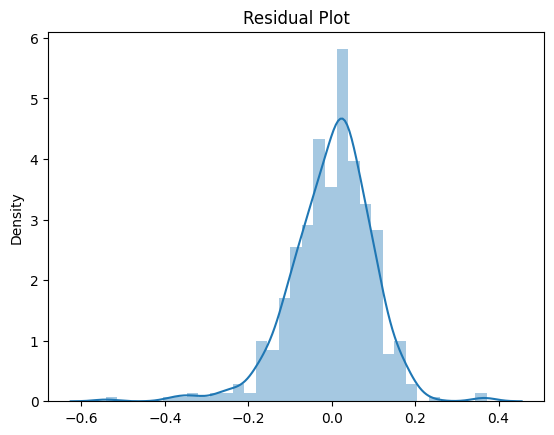

In [60]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

### PREDICTIONS AND EVALUATION OF THE TEST SET

In [61]:
# 1. CREATE LIST OF NUMERIC VARIABLES
num_list = ['instant', 'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 2. FIT ON DATA
df_test[num_list] = scaler.transform(df_test[num_list])

df_test.head()

,instant,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
184,0.252747,0.0,1.0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,1
535,0.734890,1.0,0.0,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,1,0,0,0,0,0,0,0
299,0.410714,0.0,0.0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0.303571,0.0,0.0,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0.208791,0.0,0.0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,0,0,0


In [62]:
y_test = df_test.pop('cnt')
x_test = df_test

In [63]:
X_test_sm = sm.add_constant(x_test)
X_test_sm.head()

,const,instant,yr,holiday,temp,atemp,hum,windspeed,spring,summer,...,January,July,June,March,May,November,October,September,Light Snow or Rain,Mist or Cloudy
184,1.0,0.252747,0.0,1.0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1.0,0.734890,1.0,0.0,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,1,0,0,0,0,0,0,0
299,1.0,0.410714,0.0,0.0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,0,1,0,0,1
221,1.0,0.303571,0.0,0.0,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0.208791,0.0,0.0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,1,0,0,0,0,0,0,0


In [64]:
X_test_sm = X_test_sm.drop(['instant','temp', 'atemp', 'hum', 'winter', 'spring'], axis=1)

In [65]:
Y_test_pred = lr_model.predict(X_test_sm)

In [66]:
r2 = r2_score(y_true=y_test, y_pred=Y_test_pred)
r2

0.7659851656615239

#### EVALUATION SET PRODUCING R-SQUARED AS 76.5%